In [321]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import scipy.stats as st

In [322]:
path = r"D:\LHUMSS\LHUMSS_2024\01_Rio_Oso\02_climate\14_variabilidad_climatica\pr_estaciones_cuenca_rio_rocha.csv"
pcp_df = pd.read_csv(path, encoding = 'latin8')
pcp_df.iloc[:,0] = pd.to_datetime(pcp_df.iloc[:,0])
pcp_df = pcp_df.set_index('date')
mon_pcp_df = pcp_df.groupby([pcp_df.index.year, pcp_df.index.month]).sum()
mon_date = pd.date_range(pcp_df.index[0], pcp_df.index[-1], freq='M')
mon_pcp_df = mon_pcp_df.set_index(mon_date)
mon_pcp_df.columns

Index(['Arani', 'Capinota', 'CBBA Aeropuerto', 'Colomi', 'La Tamborada',
       'La Violeta', 'Pairumani', 'Parotani', 'San Benito', 'Santivañez',
       'Sarco', 'Tarata', 'Tiraque', '4 Esquinas', 'Morochata', 'Misicuni'],
      dtype='object')

In [323]:
station = 'CBBA Aeropuerto'
station_mon_pcp_df = pd.DataFrame(mon_pcp_df[station][7:-5])
station_mon_pcp_df

,CBBA Aeropuerto
1970-08-31,0.0
1970-09-30,10.0
1970-10-31,20.0
1970-11-30,10.0
1970-12-31,56.2
...,...
2021-03-31,28.7
2021-04-30,22.3
2021-05-31,0.0
2021-06-30,0.0


In [324]:
def QPM(year, baseline, T_baseline, random, L_block):
    pf_general_random = []
    
    for i in range(0,1000):
        
        block_window = random[i*12 : i*12+L_block*12] # Seleccionar la ventana 12 años
        sorted_block_window = np.sort(block_window)[::-1]
        arr_values = np.arange(1,len(sorted_block_window)+1,1)
        T_block = (L_block*12)/arr_values

        thisQuantiles_obs   = np.interp(T_block,np.sort(T_baseline),np.sort(baseline))

        pf = sorted_block_window / thisQuantiles_obs
        
        if len(pf) == 144:
            pf_avg = np.mean(pf[np.isfinite(pf)])
            pf_general_random.append(pf_avg)

        else:
            return pf_general_random 
            break  

In [325]:
def mon_QPM_method(mon_var_df, L_block):
    
    year = mon_var_df.index[-1].year - mon_var_df.index[0].year - L_block + 1
    
    # Baseline
    station = mon_var_df.columns[0] 
    n = len(mon_var_df)
    baseline_arr_rank = np.arange(1,len(mon_var_df)+1,1)
    T_baseline = n/baseline_arr_rank

    # Values
    baseline_and_random_series = np.zeros((1001, len(mon_var_df[station])))
    baseline = np.array(mon_var_df[station])
    baseline_and_random_series[0] = baseline
           
    for i in range(1,1001):
        random_arr = np.random.permutation(arr_serie)
        baseline_and_random_series[i] = random_arr 
    
    pfs_random = np.zeros((1001,year))
    
    for i,random in enumerate(baseline_and_random_series):
        x = QPM(year, baseline, T_baseline, random, L_block)
        pfs_random[i] = x
        print(i,"iteration")
    
    interval_low = []
    interval_upp = []
    for i in range(0,year):
        pf_data = pfs_random[:,i]
        low = np.percentile(pf_data,2.5)
        upp = np.percentile(pf_data,97.5)
        interval_low.append(low) 
        interval_upp.append(upp)
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    n_year = np.arange(mon_var_df.index[0].year, mon_var_df.index[-1].year - L_block + 1, 1)

    ax.plot(n_year, (np.array(pfs_random[0])-1)*100, marker = 'o', markersize=4, label='Perturbed factors')
    ax.plot(n_year, (np.array(interval_low)-1)*100, linestyle='--', color='C3', label='Confidence interval 95%')
    ax.plot(n_year, (np.array(interval_upp)-1)*100, linestyle='--', color='C3')
    
    ax.set_ylabel("Anomaly PF(%)")
    ax.set_xlabel("Tiempo")
    ax.set_title(f"{station} - {L_block} block year")
    #ax.legend(loc='best', fontsize=11)
    ax.legend(loc='best', bbox_to_anchor=(0.9, -0.12), fontsize=10,  ncol=2)

    ax.grid()  
    
    return [pfs_random[:,0], interval_low, interval_upp]

C:\Users\Carolina\AppData\Local\Temp\ipykernel_8612\2459033913.py:13: RuntimeWarning: invalid value encountered in divide
  pf = sorted_block_window / thisQuantiles_obs
C:\Users\Carolina\AppData\Local\Temp\ipykernel_8612\2459033913.py:13: RuntimeWarning: divide by zero encountered in divide
  pf = sorted_block_window / thisQuantiles_obs


0 iteration
1 iteration
2 iteration
3 iteration
4 iteration
5 iteration
6 iteration
7 iteration
8 iteration
9 iteration
10 iteration
11 iteration
12 iteration
13 iteration
14 iteration
15 iteration
16 iteration
17 iteration
18 iteration
19 iteration
20 iteration
21 iteration
22 iteration
23 iteration
24 iteration
25 iteration
26 iteration
27 iteration
28 iteration
29 iteration
30 iteration
31 iteration
32 iteration
33 iteration
34 iteration
35 iteration
36 iteration
37 iteration
38 iteration
39 iteration
40 iteration
41 iteration
42 iteration
43 iteration
44 iteration
45 iteration
46 iteration
47 iteration
48 iteration
49 iteration
50 iteration
51 iteration
52 iteration
53 iteration
54 iteration
55 iteration
56 iteration
57 iteration
58 iteration
59 iteration
60 iteration
61 iteration
62 iteration
63 iteration
64 iteration
65 iteration
66 iteration
67 iteration
68 iteration
69 iteration
70 iteration
71 iteration
72 iteration
73 iteration
74 iteration
75 iteration
76 iteration
77 iterat

694 iteration
695 iteration
696 iteration
697 iteration
698 iteration
699 iteration
700 iteration
701 iteration
702 iteration
703 iteration
704 iteration
705 iteration
706 iteration
707 iteration
708 iteration
709 iteration
710 iteration
711 iteration
712 iteration
713 iteration
714 iteration
715 iteration
716 iteration
717 iteration
718 iteration
719 iteration
720 iteration
721 iteration
722 iteration
723 iteration
724 iteration
725 iteration
726 iteration
727 iteration
728 iteration
729 iteration
730 iteration
731 iteration
732 iteration
733 iteration
734 iteration
735 iteration
736 iteration
737 iteration
738 iteration
739 iteration
740 iteration
741 iteration
742 iteration
743 iteration
744 iteration
745 iteration
746 iteration
747 iteration
748 iteration
749 iteration
750 iteration
751 iteration
752 iteration
753 iteration
754 iteration
755 iteration
756 iteration
757 iteration
758 iteration
759 iteration
760 iteration
761 iteration
762 iteration
763 iteration
764 iteration
765 it

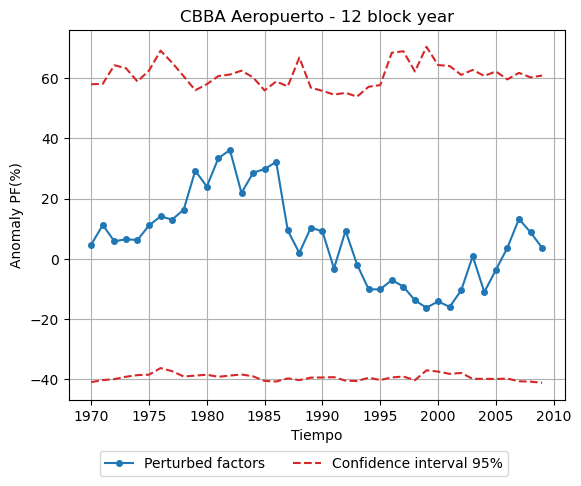

In [326]:
mon_var_df = station_mon_pcp_df
L_block = 12
quantiles = mon_QPM_method(mon_var_df, L_block)